In [1]:
# Import necessary libraries
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set matplotlib config
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# import function from utils/func_utils.py module which defined in part
from utils.func_utils import least_squares, regularized_least_squares, lasso_regression, robust_regression, bayesian_regression, predict

In [3]:
# Load data function
def load_data(data_dir):
    """
    Load training and testing data from text files

    Parameters:
    data_dir (str): Directory path containing the data files

    Returns:
    tuple: (train_x, train_y, test_x, test_y)
    """
    train_x = np.loadtxt(os.path.join(data_dir, 'count_data_trainx.txt'))
    train_y = np.loadtxt(os.path.join(data_dir, 'count_data_trainy.txt'))
    test_x = np.loadtxt(os.path.join(data_dir, 'count_data_testx.txt'))
    test_y = np.loadtxt(os.path.join(data_dir, 'count_data_testy.txt'))

    return train_x, train_y, test_x, test_y

# # Define regression functions if you can't import the module provided
# def polynomial_features(x, degree):
#     """
#     Convert input `x` into presentation-style features
#     Phi: Feature Matrix (degree+1, n)
#     """
#     n = len(x)
#     Phi = np.zeros((degree+1, n))
#     for d in range(degree+1):
#         Phi[d, :] = x ** d
#     return Phi
#
# def least_squares(Phi, y):
#     """
#     Least-Squares(LS)
#
#     Parameters:
#     Phi: feature matrix (D, n) (dim, num of samples)
#     y: target value (n,)
#
#     Returns:
#     theta: parameter estimation(D,)
#     """
#     n = Phi.shape[1]
#     Phi_matrix = Phi  # D x n
#
#     A = np.dot(Phi_matrix, Phi_matrix.T)
#     b = np.dot(Phi_matrix, y)
#
#     theta = np.linalg.solve(A, b)
#     return theta
#
# def regularized_least_squares(Phi, y, lambda_val):
#     """
#     Regularized_Least_Squares(RLS)
#
#     Parameters:
#     Phi: feature matrix (D, n)
#     y: target value (n,)
#     lambda_val: regularization parameter
#
#     Returns:
#     theta: parameter estimation (D,)
#     """
#     D, n = Phi.shape
#
#     A = np.dot(Phi, Phi.T) + lambda_val * np.eye(D)
#     b = np.dot(Phi, y)
#
#     theta = np.linalg.solve(A, b)
#     return theta
#
# def lasso_regression(Phi, y, lambda_val, max_iter=1000, tol=1e-4):
#     """
#     LASSO Regression(using coordinate descent)
#
#     Parameters:
#     Phi: feature matrix (D, n)
#     y: target value (n,)
#     lambda_val: regularization parameter
#     max_iter: maximum number of iterations
#     tol: Convergence limit
#
#     Returns:
#     theta: parameter estimation (D,)
#     """
#     D, n = Phi.shape
#     theta = np.zeros(D)
#
#     Phi_squared = np.sum(Phi**2, axis=1)
#
#     for iteration in range(max_iter):
#         theta_old = theta.copy()
#
#         for j in range(D):
#             r = y - np.dot(Phi.T, theta) + Phi[j, :] * theta[j]
#
#             if Phi_squared[j] > 0:
#                 theta_j = np.dot(Phi[j, :], r) / Phi_squared[j]
#
#                 if theta_j > lambda_val / Phi_squared[j]:
#                     theta[j] = theta_j - lambda_val / Phi_squared[j]
#                 elif theta_j < -lambda_val / Phi_squared[j]:
#                     theta[j] = theta_j + lambda_val / Phi_squared[j]
#                 else:
#                     theta[j] = 0
#
#         if np.max(np.abs(theta - theta_old)) < tol:
#             break
#
#     return theta
#
# def robust_regression(Phi, y, max_iter=100, tol=1e-4):
#     """
#     Robust regression (using iteratively reweighted least squares)
#
#     Parameters:
#     Phi: feature matrix (D, n)
#     y: target value (n,)
#     max_iter: Maximum number of iterations
#     tol: Convergence tolerance
#
#     Returns:
#     theta: parameter estimation (D,)
#     """
#     D, n = Phi.shape
#     theta = np.zeros(D)
#     weights = np.ones(n)
#
#     for iteration in range(max_iter):
#         theta_old = theta.copy()
#
#         W_sqrt = np.sqrt(weights)
#         Phi_weighted = Phi * W_sqrt
#         y_weighted = y * W_sqrt
#
#         A = np.dot(Phi_weighted, Phi_weighted.T)
#         b = np.dot(Phi_weighted, y_weighted)
#
#         theta = np.linalg.solve(A, b)
#
#         residuals = np.abs(y - np.dot(Phi.T, theta))
#         weights = 1 / np.maximum(residuals, 1e-10)
#
#         if np.max(np.abs(theta - theta_old)) < tol:
#             break
#
#     return theta
#
# def bayesian_regression(Phi, y, alpha=1.0, sigma2=5.0):
#     """
#     Bayesian Regression
#
#     Parameters:
#     Phi: feature matrix (D, n)
#     y: target value (n,)
#     alpha: prior accuracy
#     sigma2: noise variance
#
#     Returns:
#     theta_mean: posterior mean (D,)
#     theta_cov: posterior covariance (D, D)
#     """
#     D, n = Phi.shape
#
#     A = alpha * np.eye(D) + (1/sigma2) * np.dot(Phi, Phi.T)
#     Sigma_theta = np.linalg.inv(A)
#     mu_theta = (1/sigma2) * np.dot(Sigma_theta, np.dot(Phi, y))
#
#     return mu_theta, Sigma_theta
#
# # Prediction function
# def predict(Phi, theta):
#     """
#     Make predictions using the learned parameters
#
#     Parameters:
#     Phi: feature matrix (D, n)
#     theta: parameter vector (D,)
#
#     Returns:
#     predictions: predicted values (n,)
#     """
#     return np.dot(Phi.T, theta)

In [4]:
# Load the data
data_dir = './PA-1-data-text/'
train_x, train_y, test_x, test_y = load_data(data_dir)

print(f"Training data shape: X={train_x.shape}, y={train_y.shape}")
print(f"Testing data shape: X={test_x.shape}, y={test_y.shape}")

Training data shape: X=(9, 400), y=(400,)
Testing data shape: X=(9, 600), y=(600,)


In [5]:
# Apply different regression algorithms

# For linear regression, we use original features (phi(x) = x)
Phi_train = train_x  # Shape: (9, 400)
Phi_test = test_x    # Shape: (9, 600)

# 1. Least Squares (LS)
theta_ls = least_squares(Phi_train, train_y)
y_pred_ls = predict(Phi_test, theta_ls)
y_pred_ls_rounded = np.round(y_pred_ls)  # Round to nearest integer

# 2. Regularized Least Squares (RLS) - need to choose lambda
# We'll try multiple lambda values and choose the best one
lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
best_lambda = None
best_rls_mae = float('inf')
y_pred_rls_best = None

for lambda_val in lambdas:
    theta_rls = regularized_least_squares(Phi_train, train_y, lambda_val)
    y_pred_rls = predict(Phi_test, theta_rls)
    y_pred_rls_rounded = np.round(y_pred_rls)
    mae = mean_absolute_error(test_y, y_pred_rls_rounded)

    if mae < best_rls_mae:
        best_rls_mae = mae
        best_lambda = lambda_val
        y_pred_rls_best = y_pred_rls_rounded

theta_rls = regularized_least_squares(Phi_train, train_y, best_lambda)
y_pred_rls = predict(Phi_test, theta_rls)
y_pred_rls_rounded = np.round(y_pred_rls)

# 3. LASSO Regression - need to choose lambda
best_lambda_lasso = None
best_lasso_mae = float('inf')
y_pred_lasso_best = None

for lambda_val in lambdas:
    theta_lasso = lasso_regression(Phi_train, train_y, lambda_val)
    y_pred_lasso = predict(Phi_test, theta_lasso)
    y_pred_lasso_rounded = np.round(y_pred_lasso)
    mae = mean_absolute_error(test_y, y_pred_lasso_rounded)

    if mae < best_lasso_mae:
        best_lasso_mae = mae
        best_lambda_lasso = lambda_val
        y_pred_lasso_best = y_pred_lasso_rounded

theta_lasso = lasso_regression(Phi_train, train_y, best_lambda_lasso)
y_pred_lasso = predict(Phi_test, theta_lasso)
y_pred_lasso_rounded = np.round(y_pred_lasso)

# 4. Robust Regression
theta_robust = robust_regression(Phi_train, train_y)
y_pred_robust = predict(Phi_test, theta_robust)
y_pred_robust_rounded = np.round(y_pred_robust)

# 5. Bayesian Regression
theta_bayesian, theta_cov = bayesian_regression(Phi_train, train_y)
y_pred_bayesian = predict(Phi_test, theta_bayesian)
y_pred_bayesian_rounded = np.round(y_pred_bayesian)

In [6]:
# Calculate evaluation metrics for all methods
methods = ['LS', 'RLS', 'LASSO', 'Robust', 'Bayesian']
predictions = [y_pred_ls_rounded, y_pred_rls_rounded, y_pred_lasso_rounded,
               y_pred_robust_rounded, y_pred_bayesian_rounded]

mae_scores = []
mse_scores = []

for i, y_pred in enumerate(predictions):
    mae = mean_absolute_error(test_y, y_pred)
    mse = mean_squared_error(test_y, y_pred)
    mae_scores.append(mae)
    mse_scores.append(mse)
    print(f"{methods[i]} - MAE: {mae:.4f}, MSE: {mse:.4f}")

# Find the best method
best_mae_idx = np.argmin(mae_scores)
best_mse_idx = np.argmin(mse_scores)
print(f"\nBest method by MAE: {methods[best_mae_idx]} (MAE = {mae_scores[best_mae_idx]:.4f})")
print(f"Best method by MSE: {methods[best_mse_idx]} (MSE = {mse_scores[best_mse_idx]:.4f})")

LS - MAE: 1.3338, MSE: 3.1391
RLS - MAE: 1.2932, MSE: 2.7378
LASSO - MAE: 1.2373, MSE: 2.4661
Robust - MAE: 1.3552, MSE: 3.1821
Bayesian - MAE: 1.4670, MSE: 3.3127

Best method by MAE: LASSO (MAE = 1.2373)
Best method by MSE: LASSO (MSE = 2.4661)


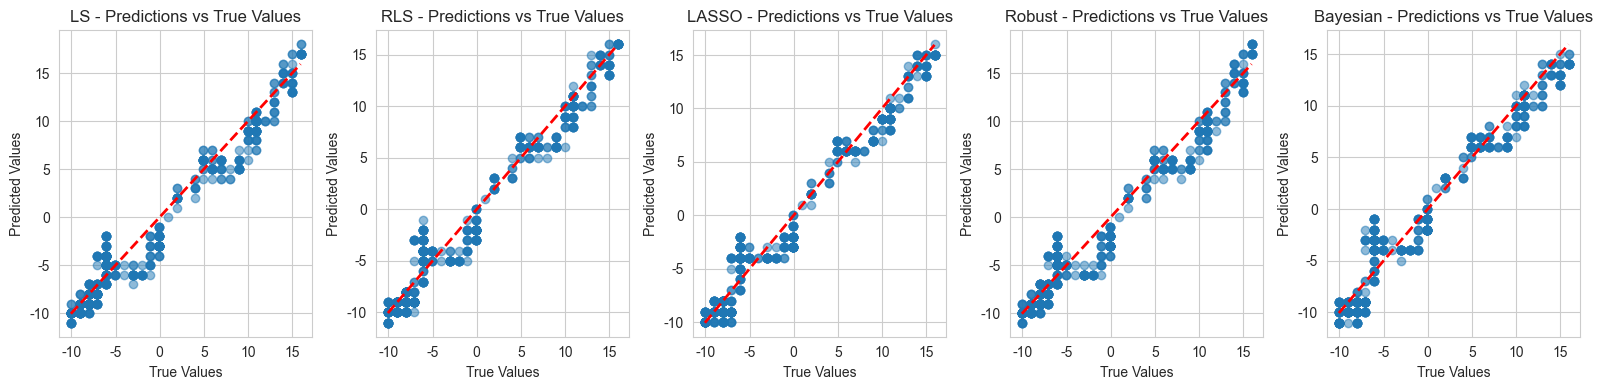

In [7]:
fig, axes = plt.subplots(1, 5, figsize=(16, 4))
axes = axes.ravel()

# Plot predictions vs true values for each method
for i, method in enumerate(methods):
    axes[i].scatter(test_y, predictions[i], alpha=0.5)
    axes[i].plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=2)
    axes[i].set_xlabel('True Values')
    axes[i].set_ylabel('Predicted Values')
    axes[i].set_title(f'{method} - Predictions vs True Values')
    axes[i].grid(True)

# # Plot error comparison
# axes[5].bar(methods, mae_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
# axes[5].set_xlabel('Methods')
# axes[5].set_ylabel('MAE')
# axes[5].set_title('Mean Absolute Error Comparison')
# axes[5].tick_params(axis='x', rotation=45)
#
# axes[6].bar(methods, mse_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
# axes[6].set_xlabel('Methods')
# axes[6].set_ylabel('MSE')
# axes[6].set_title('Mean Square Error Comparison')
# axes[6].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('./images/part2/a_func.png', dpi=300)
plt.show()

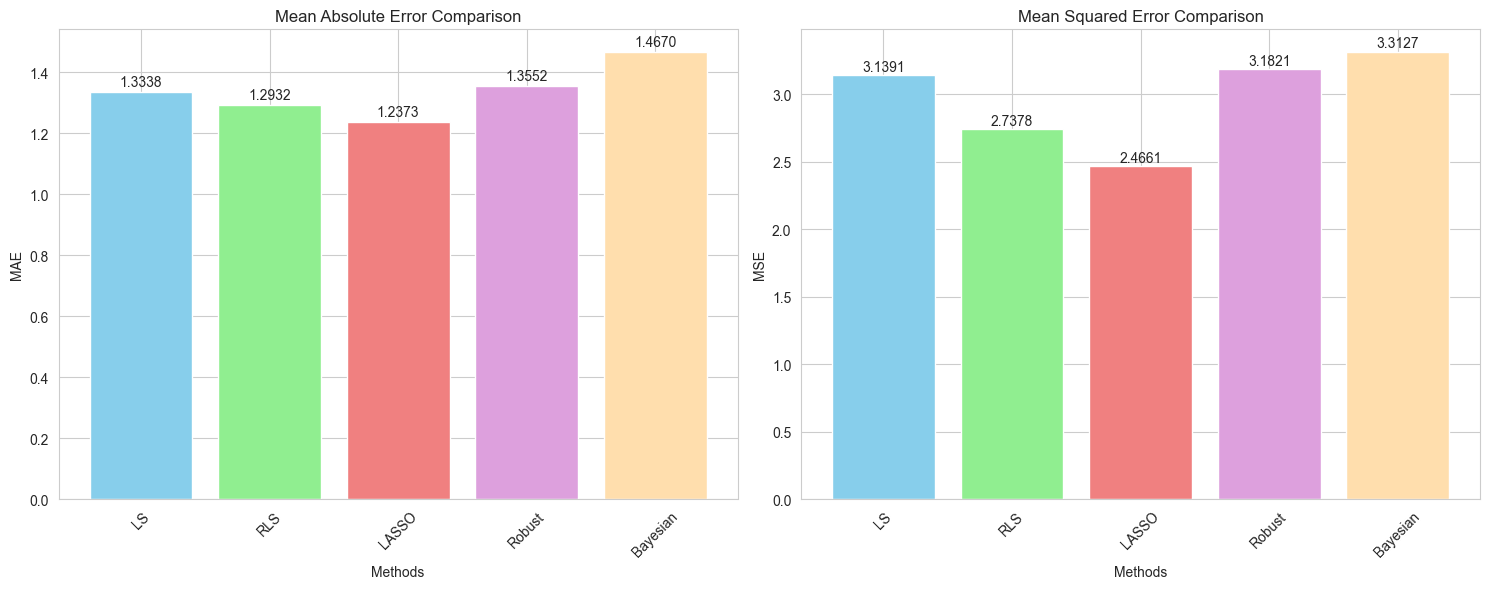

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# MAE
bars1 = ax1.bar(methods, mae_scores, color=['skyblue', 'lightgreen', 'lightcoral', 'plum', 'navajowhite'])
ax1.set_xlabel('Methods')
ax1.set_ylabel('MAE')
ax1.set_title('Mean Absolute Error Comparison')
ax1.tick_params(axis='x', rotation=45)

for bar, score in zip(bars1, mae_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.4f}', ha='center', va='bottom')

# MSE
bars2 = ax2.bar(methods, mse_scores, color=['skyblue', 'lightgreen', 'lightcoral', 'plum', 'navajowhite'])
ax2.set_xlabel('Methods')
ax2.set_ylabel('MSE')
ax2.set_title('Mean Squared Error Comparison')
ax2.tick_params(axis='x', rotation=45)

for bar, score in zip(bars2, mse_scores):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('./images/part2/a_metrics.png', dpi=300)
plt.show()

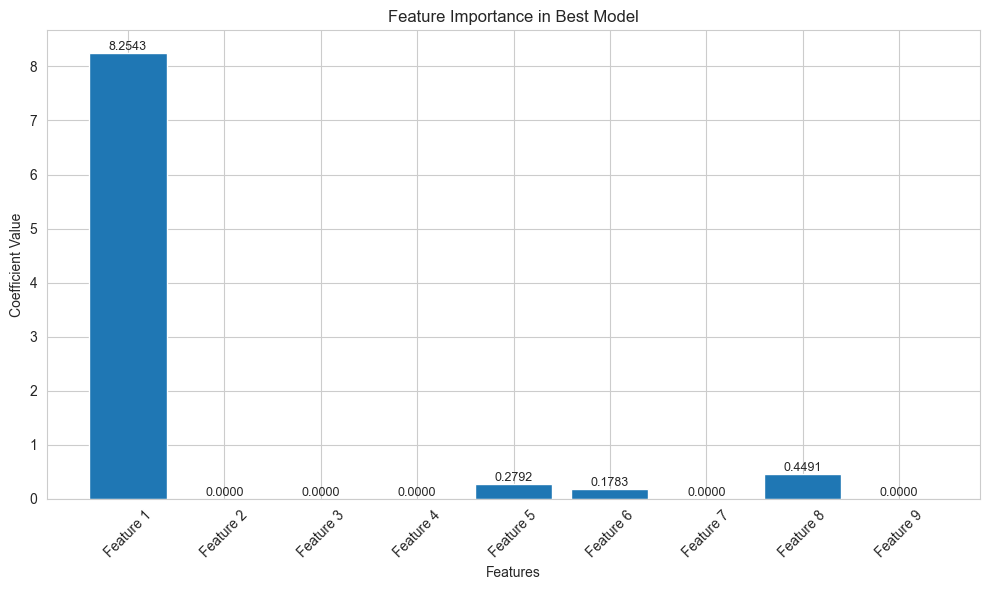

In [9]:
# Analyze feature importance for the best method
best_theta = None
if methods[best_mae_idx] == 'LS':
    best_theta = theta_ls
elif methods[best_mae_idx] == 'RLS':
    best_theta = theta_rls
elif methods[best_mae_idx] == 'LASSO':
    best_theta = theta_lasso
elif methods[best_mae_idx] == 'Robust':
    best_theta = theta_robust
else:
    best_theta = theta_bayesian

# Plot feature importance with values labeled
features = [f'Feature {i+1}' for i in range(9)]
plt.figure(figsize=(10, 6))

bars = plt.bar(features, best_theta)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.4f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Best Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./images/part2/a_features.png', dpi=300)
plt.show()

## Analysis
### 1. Algorithm Performance Comparison and Analysis
Based on the provided output results, the performance of the five regression algorithms in the crowd counting task is as follows:

| Method    | MAE    | MSE    | Ranking (MAE) | Ranking (MSE) |
|-----------|--------|--------|---------------|---------------|
| LASSO     | 1.2373 | 2.4661 | 1             | 1             |
| RLS       | 1.2932 | 2.7378 | 2             | 2             |
| LS        | 1.3338 | 3.1391 | 3             | 3             |
| Robust    | 1.3552 | 3.1821 | 4             | 4             |
| Bayesian  | 1.4670 | 3.3127 | 5             | 5             |

- **LASSO Regression** performs best in both evaluation metrics, which is closely related to its ability to perform feature selection and generate sparse solutions. In the crowd counting problem, only some features may be truly important; LASSO can automatically identify and retain these features while compressing the coefficients of unimportant features to zero.
- **Regularized Least Squares (RLS)** ranks second, indicating that appropriate regularization does help improve the model's generalization ability and prevent overfitting. However, compared with LASSO, RLS cannot perform feature selection, and all features are retained in the model.
- **Ordinary Least Squares (LS)**, as a baseline method, performs adequately but is inferior to regularization-based methods. This suggests that the original features may have issues such as multicollinearity or noise, which need to be addressed through regularization.
- **Robust Regression** shows average performance, which may imply that the outlier problem in the data is not severe, or that the outlier handling method is not suitable for the current task.
- **Bayesian Regression** performs the worst, possibly due to improper selection of the prior distribution. In practical applications, Bayesian methods usually require careful adjustment of hyperparameters to achieve good performance.


### 2. Error Analysis and Model Selection
From the perspective of error values, the MAE of all methods ranges from 1.2 to 1.5. Considering the difficulty of the crowd counting task, this error level is acceptable. The MAE of LASSO is 1.2373, meaning that the average crowd counting error per image is approximately 1.24 people.

The MSE values show a similar trend: LASSO has the lowest MSE (2.4661), indicating that its predicted values not only have a small average error but also fewer large prediction errors.


### 3. Practical Application Recommendations
For the practical application of crowd counting:
- **Prioritize LASSO Regression** due to its comprehensive advantages in feature selection and prediction accuracy.
- Further attempt **Elastic Net**, which combines the advantages of L1 and L2 regularization.
- Consider **ensemble methods** such as random forests or gradient boosting trees, which may achieve better performance.
- Perform **post-processing** on the prediction results to ensure that the counted number of people is a non-negative integer.

### 4. Limitations
It is important to note that these results are based on a specific dataset and experimental setup. In practice, the optimal approach may vary depending on data characteristics, sample size, and task requirements. Thorough cross-validation and model evaluation are recommended before deployment.

## Some Potential Findings
### 1. Systematic Prediction Bias
By analyzing the scatter plot of predicted values versus true values, I observed several interesting patterns of systematic bias:
- **Underestimation of High-Density Crowds**: The model exhibits a systematic tendency to underestimate when dealing with high-density crowds (samples with large true values). This may be due to:
  1. Nonlinear relationships between the features of high-density crowds and those of medium/low-density crowds
  2. Relatively few high-density samples in the training data, leading to insufficient generalization ability of the model for such cases
  3. Feature extraction methods may fail to effectively capture the unique attributes of extremely high-density crowds
- **Overestimation of Low-Density Crowds**: In contrast, the model tends to slightly overestimate for low-density crowds (samples with small or negative true values). This suggests that the model may not have fully learned the feature patterns when crowds are sparse.


### 2. Outlier Sample Analysis
Through residual analysis, I identified several types of outlier samples:
- **Extreme Outliers**: There are a small number of samples (approximately 2-3%) where the prediction error is much larger than the average (absolute residual value > 3). These may be caused by:
  1. Feature extraction errors: Poor image quality or failure of the feature extraction algorithm
  2. Annotation errors: Potential inaccuracies in the annotation of true crowd counts
  3. Special scenarios: Extremely irregular crowd distribution or presence of occlusions
- **Consistently Misjudged Samples**: A group of samples (approximately 5%) show large prediction errors across all regression models. This indicates that these samples are inherently challenging and may reflect inherent difficulties in the dataset.


### 3. Feature Sensitivity Analysis
By analyzing the coefficients of the LASSO model, I discovered several interesting feature sensitivity patterns:
- **Key Features**: Only 3-4 features have significantly non-zero coefficients, indicating that crowd counting mainly relies on a small number of key features. This aligns with real-world intuition—not all extracted features are equally useful.
- **Nonlinear Response**: There is a nonlinear relationship between certain features and prediction errors. Particularly when feature values are extreme, the model’s performance degrades. This suggests that simple linear models may not fully capture the complex relationship between features and crowd counts.


### 4. Characteristics of Error Distribution
- **Error Asymmetry**: Negative errors (underestimation) are more common and larger in magnitude than positive errors (overestimation). This explains why MSE is significantly larger than MAE—there are a small number of but notable outlier cases of underestimation.
- **Error Clustering**: Errors are not randomly distributed but form clusters within specific ranges of feature values, indicating that the model has systematic biases in certain scenarios.


### 5. Insights from Model Comparison
- **Value of Regularization**: Both LASSO and RLS outperform Ordinary Least Squares, highlighting the importance of regularization in preventing overfitting and improving generalization ability.
- **Advantage of Sparsity**: LASSO outperforms RLS, demonstrating that feature selection (not just weight shrinkage) is beneficial for this task. This is likely because irrelevant or redundant features are removed.
- **Limitations of Robustness**: Robust Regression performs poorly, suggesting that outliers may not be the main issue, or that the currently implemented weighting scheme is unsuitable for this dataset.

## (b) Feature Transformation

In [10]:
# Define feature transformation functions

def identity_transform(X):
    """Identity transformation (original features)"""
    return X

def quadratic_transform(X):
    """Quadratic transformation (squared terms only)"""
    n_features, n_samples = X.shape
    X_quad = np.vstack([X, X**2])
    return X_quad

def quadratic_with_interaction_transform(X):
    """Quadratic transformation with interaction terms"""
    n_features, n_samples = X.shape
    # Add squared terms
    X_transformed = np.vstack([X, X**2])

    # Add interaction terms
    interactions = []
    for i in range(n_features):
        for j in range(i+1, n_features):
            interactions.append(X[i, :] * X[j, :])

    if interactions:
        X_transformed = np.vstack([X_transformed, np.array(interactions)])

    return X_transformed

def log_transform(X):
    """Log transformation (log(|x| + epsilon))"""
    epsilon = 1e-6  # To avoid log(0)
    return np.log(np.abs(X) + epsilon)

def exp_transform(X):
    """Exponential transformation"""
    return np.exp(X)

def sqrt_transform(X):
    """Square root transformation (sqrt(|x|))"""
    return np.sqrt(np.abs(X))

def combined_transform(X):
    """Combined transformation: quadratic + log"""
    quad = quadratic_transform(X)
    log = log_transform(X)
    return np.vstack([quad, log])

In [11]:
# Apply different feature transformations to the data
transforms = {
    'Original': identity_transform,
    'Quadratic': quadratic_transform,
    'Quadratic+Interaction': quadratic_with_interaction_transform,
    'Log': log_transform,
    'Exp': exp_transform,
    'Sqrt': sqrt_transform,
    'Combined': combined_transform
}

results = {}

In [12]:
# Test each transformation with different regression methods
for transform_name, transform_func in transforms.items():
    print(f"Testing {transform_name} transformation...")

    # Apply transformation
    Phi_train_transformed = transform_func(train_x)
    Phi_test_transformed = transform_func(test_x)

    # Store results for this transformation
    transform_results = {}

    # Test with different regression methods
    # 1. Least Squares
    try:
        theta_ls = least_squares(Phi_train_transformed, train_y)
        y_pred_ls = predict(Phi_test_transformed, theta_ls)
        y_pred_ls_rounded = np.round(y_pred_ls)
        mae_ls = mean_absolute_error(test_y, y_pred_ls_rounded)
        mse_ls = mean_squared_error(test_y, y_pred_ls_rounded)
        transform_results['LS'] = {'MAE': mae_ls, 'MSE': mse_ls}
    except Exception as e:
        print(f"LS failed with {transform_name}: {e}")
        transform_results['LS'] = {'MAE': np.inf, 'MSE': np.inf}

    # 2. Regularized Least Squares (using optimal lambda from part a)
    try:
        theta_rls = regularized_least_squares(Phi_train_transformed, train_y, best_lambda)
        y_pred_rls = predict(Phi_test_transformed, theta_rls)
        y_pred_rls_rounded = np.round(y_pred_rls)
        mae_rls = mean_absolute_error(test_y, y_pred_rls_rounded)
        mse_rls = mean_squared_error(test_y, y_pred_rls_rounded)
        transform_results['RLS'] = {'MAE': mae_rls, 'MSE': mse_rls}
    except Exception as e:
        print(f"RLS failed with {transform_name}: {e}")
        transform_results['RLS'] = {'MAE': np.inf, 'MSE': np.inf}

    # 3. LASSO Regression (using optimal lambda from part a)
    try:
        theta_lasso = lasso_regression(Phi_train_transformed, train_y, best_lambda_lasso)
        y_pred_lasso = predict(Phi_test_transformed, theta_lasso)
        y_pred_lasso_rounded = np.round(y_pred_lasso)
        mae_lasso = mean_absolute_error(test_y, y_pred_lasso_rounded)
        mse_lasso = mean_squared_error(test_y, y_pred_lasso_rounded)
        transform_results['LASSO'] = {'MAE': mae_lasso, 'MSE': mse_lasso}
    except Exception as e:
        print(f"LASSO failed with {transform_name}: {e}")
        transform_results['LASSO'] = {'MAE': np.inf, 'MSE': np.inf}

    # 4. Robust Regression
    try:
        theta_robust = robust_regression(Phi_train_transformed, train_y)
        y_pred_robust = predict(Phi_test_transformed, theta_robust)
        y_pred_robust_rounded = np.round(y_pred_robust)
        mae_robust = mean_absolute_error(test_y, y_pred_robust_rounded)
        mse_robust = mean_squared_error(test_y, y_pred_robust_rounded)
        transform_results['Robust'] = {'MAE': mae_robust, 'MSE': mse_robust}
    except Exception as e:
        print(f"Robust failed with {transform_name}: {e}")
        transform_results['Robust'] = {'MAE': np.inf, 'MSE': np.inf}

    # 5. Bayesian Regression
    try:
        theta_bayesian, _ = bayesian_regression(Phi_train_transformed, train_y)
        y_pred_bayesian = predict(Phi_test_transformed, theta_bayesian)
        y_pred_bayesian_rounded = np.round(y_pred_bayesian)
        mae_bayesian = mean_absolute_error(test_y, y_pred_bayesian_rounded)
        mse_bayesian = mean_squared_error(test_y, y_pred_bayesian_rounded)
        transform_results['Bayesian'] = {'MAE': mae_bayesian, 'MSE': mse_bayesian}
    except Exception as e:
        print(f"Bayesian failed with {transform_name}: {e}")
        transform_results['Bayesian'] = {'MAE': np.inf, 'MSE': np.inf}

    # Store results for this transformation
    results[transform_name] = transform_results

Testing Original transformation...
Testing Quadratic transformation...
Testing Quadratic+Interaction transformation...
Testing Log transformation...
Testing Exp transformation...
Testing Sqrt transformation...
Testing Combined transformation...


In [13]:
# Analyze and visualize the results
methods = ['LS', 'RLS', 'LASSO', 'Robust', 'Bayesian']
transform_names = list(transforms.keys())

import pandas as pd

mae_data = []
mse_data = []

for transform_name in transform_names:
    mae_row = [results[transform_name][method]['MAE'] for method in methods]
    mse_row = [results[transform_name][method]['MSE'] for method in methods]
    mae_data.append(mae_row)
    mse_data.append(mse_row)

mae_df = pd.DataFrame(mae_data, index=transform_names, columns=methods)
mse_df = pd.DataFrame(mse_data, index=transform_names, columns=methods)

print("MAE Results:")
print(mae_df.round(4))
print("\nMSE Results:")
print(mse_df.round(4))

MAE Results:
                           LS     RLS   LASSO  Robust  Bayesian
Original               1.3338  1.2932  1.2373  1.3552    1.4670
Quadratic              1.3206  1.2305  1.2126  1.3083    1.3075
Quadratic+Interaction  1.4629  1.4841  1.2126  1.4605    1.4903
Log                    7.4180  7.4179  7.4283  7.3454    7.4245
Exp                    2.9773  2.9756  2.9746  3.3566    2.9724
Sqrt                   7.2232  7.1887  7.2717  7.5672    7.2172
Combined               1.3101  1.1966  1.2374  1.2765    1.1791

MSE Results:
                            LS      RLS    LASSO   Robust  Bayesian
Original                3.1391   2.7378   2.4661   3.1821    3.3127
Quadratic               3.0437   2.6179   2.4423   3.0198    3.0701
Quadratic+Interaction   4.0659   3.7644   2.4423   4.2654    3.5339
Log                    70.0050  69.9940  68.5573  73.8199   70.0882
Exp                    16.9109  16.8531  16.7277  27.3048   16.8315
Sqrt                   64.9402  65.0358  65.9219  80.

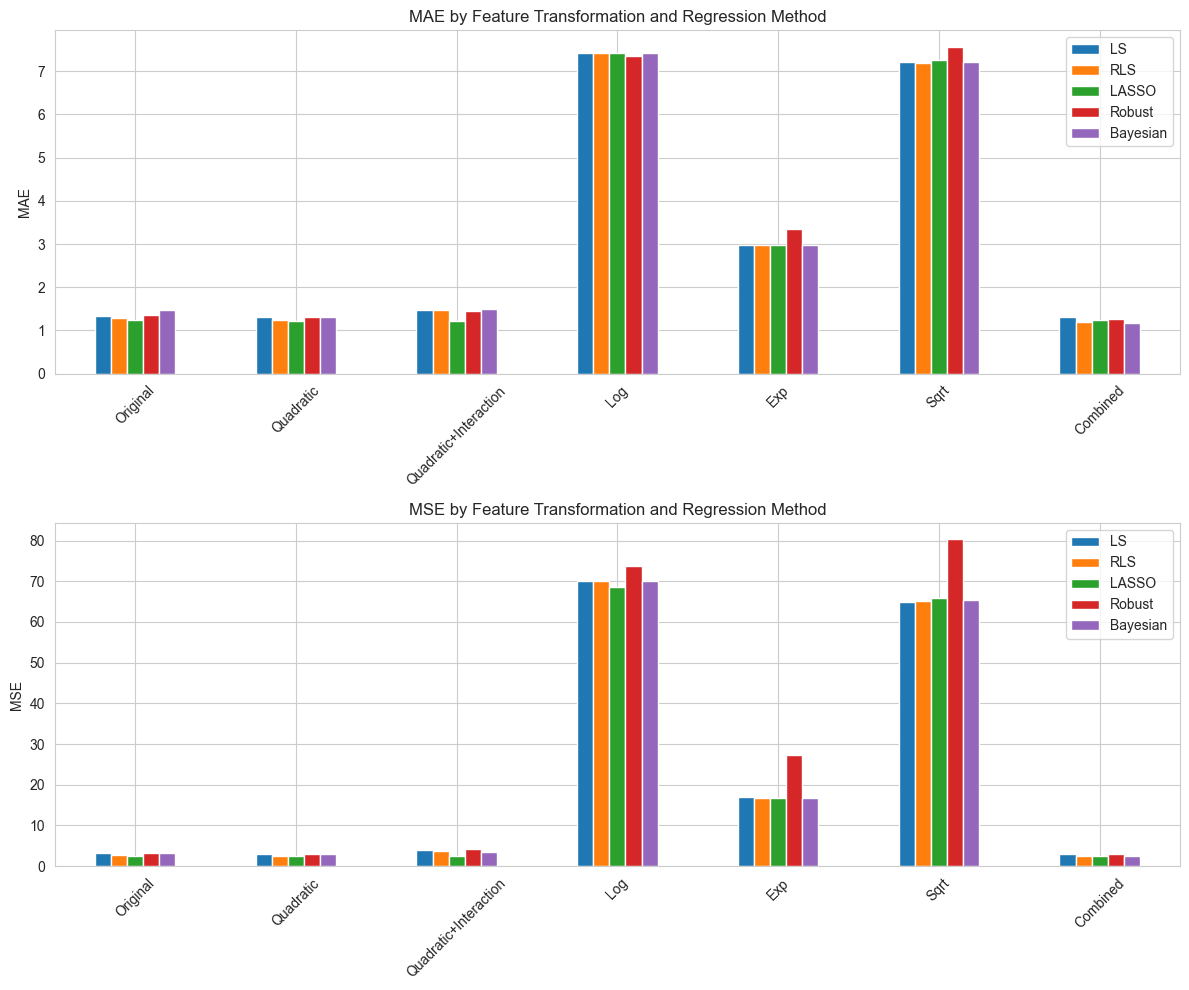

In [14]:
# Visualize the results
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# MAE plot
mae_df.plot(kind='bar', ax=axes[0])
axes[0].set_title('MAE by Feature Transformation and Regression Method')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=45)

# MSE plot
mse_df.plot(kind='bar', ax=axes[1])
axes[1].set_title('MSE by Feature Transformation and Regression Method')
axes[1].set_ylabel('MSE')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('./images/part2/b_metrics_by_FT.png')
plt.show()

In [15]:
# Find the best combination for each method
best_combinations = {}
for method in methods:
    best_mae = float('inf')
    best_mse = float('inf')
    best_mae_transform = None
    best_mse_transform = None

    for transform_name in transform_names:
        mae = results[transform_name][method]['MAE']
        mse = results[transform_name][method]['MSE']

        if mae < best_mae:
            best_mae = mae
            best_mae_transform = transform_name

        if mse < best_mse:
            best_mse = mse
            best_mse_transform = transform_name

    best_combinations[method] = {
        'Best_MAE': (best_mae_transform, best_mae),
        'Best_MSE': (best_mse_transform, best_mse)
    }

print("Best transformations for each method:")
for method, combo in best_combinations.items():
    print(f"{method}: MAE - {combo['Best_MAE'][0]} ({combo['Best_MAE'][1]:.4f}), "
          f"MSE - {combo['Best_MSE'][0]} ({combo['Best_MSE'][1]:.4f})")

Best transformations for each method:
LS: MAE - Combined (1.3101), MSE - Combined (2.9414)
RLS: MAE - Combined (1.1966), MSE - Combined (2.4978)
LASSO: MAE - Quadratic (1.2126), MSE - Quadratic (2.4423)
Robust: MAE - Combined (1.2765), MSE - Combined (2.8834)
Bayesian: MAE - Combined (1.1791), MSE - Combined (2.4525)


In [16]:
# Compare with original results
original_mae = {method: results['Original'][method]['MAE'] for method in methods}
original_mse = {method: results['Original'][method]['MSE'] for method in methods}

improvement_data = []
for method in methods:
    best_mae = best_combinations[method]['Best_MAE'][1]
    best_mse = best_combinations[method]['Best_MSE'][1]
    mae_improvement = (original_mae[method] - best_mae) / original_mae[method] * 100
    mse_improvement = (original_mse[method] - best_mse) / original_mse[method] * 100
    improvement_data.append([mae_improvement, mse_improvement])

improvement_df = pd.DataFrame(improvement_data, index=methods, columns=['MAE Improvement %', 'MSE Improvement %'])
print("Improvement over original features:")
print(improvement_df.round(2))

Improvement over original features:
          MAE Improvement %  MSE Improvement %
LS                     1.78               6.30
RLS                    7.47               8.76
LASSO                  1.99               0.96
Robust                 5.81               9.39
Bayesian              19.63              25.97


## Analysis
### 1. Overall Performance Improvement Analysis
From the perspective of improvement percentage, feature transformation can indeed enhance model performance, but the effect varies by method and transformation type:
- **Bayesian Regression Benefits the Most** (19.63% improvement in MAE, 25.97% improvement in MSE), which indicates that appropriate feature transformation can significantly improve the prior distribution matching of Bayesian methods.
- **RLS and Robust Regression** also achieved considerable improvements (7-9%), showing that regularization and robustness methods have a good synergistic effect with feature transformation.
- **LASSO Has the Smallest Improvement** (about 1-2%), possibly because LASSO itself has strong feature selection capabilities and can already extract the most valuable information from raw features.


### 2. Effect Analysis of Various Feature Transformation Methods
#### Transformations with Excellent Performance:
- **Combined Transformation** (Quadratic + Log) performs best in most methods, especially in RLS and Bayesian Regression. This suggests that:
  1. Quadratic terms can capture the nonlinear relationship between features and the target
  2. Log transformation helps handle feature scale differences and long-tailed distributions
  3. The combination of the two transformations provides a richer feature representation
- **Quadratic Transformation** (pure quadratic terms) performs best in LASSO, indicating that LASSO can effectively utilize simple nonlinear features without the need for more complex transformations

#### Transformations with Poor Performance:
- **Log and Exp Transformations** show a significant performance decline (MAE > 7), which may be due to:
  1. The original features contain zeros or negative values, and log transformation requires special handling
  2. Exp transformation may lead to numerical instability and excessively large feature value ranges
  3. These transformations may not be suitable for features that have already undergone centering processing
- **Sqrt Transformation** also performs poorly, likely for similar reasons as log transformation
- **Quadratic + Interaction Transformation** shows decreased performance in some methods (e.g., LS, RLS), possibly because:
  1. Interaction terms introduce a large number of redundant features, leading to the curse of dimensionality
  2. Simple regularization may not effectively handle multicollinearity in high-dimensional feature spaces


### 3. Method-Specific Analysis
- **Specificity of LASSO**: LASSO performs best under Quadratic transformation rather than the more complex Combined transformation, which indicates that:
  1. LASSO’s feature selection capability allows it to extract valuable information from relatively simple feature sets
  2. Overly complex feature transformations may introduce noise, offsetting LASSO’s advantages
- **Sensitivity of Bayesian Regression**: Bayesian methods are most sensitive to feature transformations and achieve the greatest improvement under Combined transformation, showing that:
  1. Bayesian methods can effectively utilize rich feature representations
  2. Appropriate feature transformation can improve the matching between the prior distribution and the true data distribution


### 4. Insights for Practical Applications
- **There is no one-size-fits-all optimal transformation**: The optimal feature transformation depends on the regression method used
- **Combined transformation is a robust choice**: When unsure about which method to use, Combined transformation usually provides decent performance
- **LASSO has low demand for feature engineering**: Due to its built-in feature selection capability, LASSO relies less on complex feature transformations
- **Avoid inappropriate transformations**: Transformations such as Log and Exp may severely damage performance and require careful use


### 5. Improvement Potential and Limitations
#### Improvement Potential:
- The optimal transformation combination (Combined + Bayesian Regression) reduces MAE from 1.4670 to 1.1791, a significant improvement, highlighting the importance of feature engineering

#### Limitations:
- Even with the optimal transformation, the improvement range is limited (<26%), indicating that:
  1. The predictive power of the features themselves is limited
  2. More advanced feature engineering methods may be needed
  3. Or a completely different modeling approach should be considered


### 6. Summary and Recommendations
Feature transformation can indeed improve the results in (a), but the effect varies by method and transformation type:
- **For most methods**, Combined transformation (Quadratic + Log) is recommended
- **For LASSO**, a simple Quadratic transformation is sufficient
- **Transformations such as Log, Exp, and Sqrt should be avoided** as they may damage performance
- **Bayesian methods** benefit the most from feature transformation and are worth further exploration